### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
    Diría que no porque edad y altura no van correlacionadas de manera lineal
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
    Los errores son bastante pequeños, cercanos a 0. El MSE es suficiente ya que no hay errores grandes.
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split


In [2]:
lista_alumnos = [[29,  1.66], [22, 1.83], [31, 1.80], [27, 1.75], [22,1.82], [35,1.79], [34,1.90], [26,1.78], [26, 1.64], [23, 1.74],[24,1.85], [28, 1.75], [23, 1.83],[32,1.74], [34, 1.57], [27, 1.58],[38,1.70],[22, 1.79]]

In [3]:
df = pd.DataFrame(lista_alumnos, columns=['edad', 'altura'])
df

,edad,altura
0,29,1.66
1,22,1.83
2,31,1.80
3,27,1.75
4,22,1.82
5,35,1.79
6,34,1.90
7,26,1.78
8,26,1.64
9,23,1.74


In [4]:
X = np.array(df.edad).reshape(-1, 1)
y = np.array(df.altura)

In [5]:
y

array([1.66, 1.83, 1.8 , 1.75, 1.82, 1.79, 1.9 , 1.78, 1.64, 1.74, 1.85,
       1.75, 1.83, 1.74, 1.57, 1.58, 1.7 , 1.79])

<AxesSubplot:>

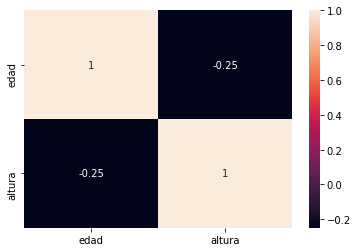

In [6]:
sns.heatmap(df.corr(), annot=True)

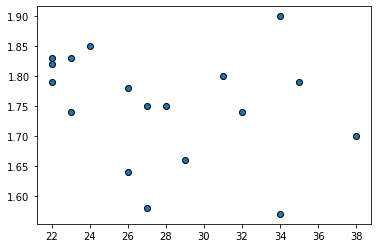

In [7]:
plt.scatter(X,y, edgecolor='black')

In [18]:
train_errors, val_errors = [], []
def plot_learning_curves(model, X, Y):
    # 80% de Train
    # 20% de Test
    X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2)
    
    for m in range(1, len(X_train)):
        x = X_train[:m]
        y = y_train[:m]
        model.fit(x, y)

        y_train_predict = model.predict(x)
        y_val_predict = model.predict(X_val)

        train_errors.append(mean_squared_error(y, y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        train_RMSE = math.sqrt(mean_squared_error(y, y_train_predict))
        val_RMSE = math.sqrt(mean_squared_error(y_val, y_val_predict))


        if m < 4:
            print("##### ITERACIÓN " + str(m) + " #####")
            print("x", x)
            print("y", y)
            print("y_train_predict", y_train_predict)
            print("-----\nX_val\n", X_val)
            print("y_val_predict", y_val_predict)

    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(val_errors, "b-", linewidth=3, label="val")
    print ("train_errors =", train_errors)
    print('------------------')
    print ("val_errors =", val_errors)
    print('------------------')
    print('train_RMSE = ', train_RMSE,'\n','val_RMSE = ', val_RMSE)
    print('--------------------')
    print(lin_reg.score(X_train, y_train) * 100)
    print(lin_reg.score(X_val, y_val) * 100)

##### ITERACIÓN 1 #####
x [[23]]
y [1.83]
y_train_predict [1.83]
-----
X_val
 [[27]
 [34]
 [24]
 [35]]
y_val_predict [1.83 1.83 1.83 1.83]
##### ITERACIÓN 2 #####
x [[23]
 [29]]
y [1.83 1.66]
y_train_predict [1.83 1.66]
-----
X_val
 [[27]
 [34]
 [24]
 [35]]
y_val_predict [1.71666667 1.51833333 1.80166667 1.49      ]
##### ITERACIÓN 3 #####
x [[23]
 [29]
 [32]]
y [1.83 1.66 1.74]
y_train_predict [1.80642857 1.73071429 1.69285714]
-----
X_val
 [[27]
 [34]
 [24]
 [35]]
y_val_predict [1.75595238 1.66761905 1.79380952 1.655     ]
train_errors = [0.0, 4.930380657631324e-32, 0.002592857142857147, 0.0019529761904761994, 0.004084159292035405, 0.0042387955182072905, 0.003638251651025377, 0.005065172413793101, 0.0045610032362459595, 0.004171011235955059, 0.004018465909090909, 0.004131879543094502, 0.0038666428571428597]
------------------
val_errors = [0.003324999999999998, 0.059779166666666654, 0.018854676870748297, 0.018509438775510253, 0.01930697098441532, 0.030295530859402516, 0.0300890712966

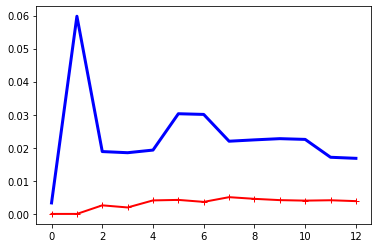

In [9]:

lin_reg = LinearRegression()
plot_learning_curves(model=lin_reg, X=X, Y=y)

In [10]:
print(lin_reg.intercept_)
print(lin_reg.coef_)

1.9924857142857142
[-0.00913571]
